<a href="https://colab.research.google.com/github/amamonova/kontakt-game/blob/data/FirstAttemp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#from google.colab import files
#uploaded = files.upload()


In [363]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [364]:
file_path = 'wiktionary_data_KEK0 (3).csv'
data = pd.read_json(file_path)
data = data.reset_index()
data = data.drop(['index'], axis=1)
print(data.head())


                title  ...                                         phraseme
0  Заглавная страница  ...                                               []
1           Фемиксира  ...                                               []
2             мальчик  ...  [а был ли мальчик?, борьба нанайских мальчиков]
3           публицист  ...                                               []
4               Хвост  ...                                               []

[5 rows x 5 columns]


In [365]:
print(data.columns)

Index(['title', 'POS', 'meanings', 'relations', 'phraseme'], dtype='object')


In [366]:
print(data['meanings'][1], type(data['meanings'][1]))

[['согласно легендам греческой мифологии — город на дальнем берегу Эвксинского Понта (Черного моря), столица племени Амазонок', ['']]] <class 'list'>


In [367]:
data.shape[0]

21

In [368]:
nums = data['meanings'].map(lambda x: len(x))
nums.head()
data.insert(len(data.columns), 'Number of meanings', nums)
data.head()

,title,POS,meanings,relations,phraseme,Number of meanings
0,Заглавная страница,,[],"{'synonyms': [], 'antonyms': [], 'hypernyms': ...",[],0
1,Фемиксира,noun,[[согласно легендам греческой мифологии — горо...,"{'synonyms': ['', ''], 'antonyms': ['', ''], '...",[],1
2,мальчик,noun,"[[ребёнок либо подросток мужского пола, [Мальч...","{'synonyms': ['частичные: малец', 'мальчуган',...","[а был ли мальчик?, борьба нанайских мальчиков]",6
3,публицист,noun,"[[журналист, пишущий о политике и общественной...","{'synonyms': [''], 'antonyms': [''], 'hypernym...",[],2
4,Хвост,noun,"[[фамилия, []], [, []]]","{'synonyms': ['', ''], 'antonyms': ['', ''], '...",[],2


In [0]:
def convert_meanings(meaning):
  try:
    mean, example = meaning[0], meaning[1]
  except IndexError:
    return 0
  return len(example)

In [370]:
nums = data['meanings'].map(convert_meanings)
nums.head()

0    0
1    0
2    2
3    2
4    2
Name: meanings, dtype: int64

In [0]:
data.insert(len(data.columns), 'Number of examples', nums)

In [372]:
data.head()

,title,POS,meanings,relations,phraseme,Number of meanings,Number of examples
0,Заглавная страница,,[],"{'synonyms': [], 'antonyms': [], 'hypernyms': ...",[],0,0
1,Фемиксира,noun,[[согласно легендам греческой мифологии — горо...,"{'synonyms': ['', ''], 'antonyms': ['', ''], '...",[],1,0
2,мальчик,noun,"[[ребёнок либо подросток мужского пола, [Мальч...","{'synonyms': ['частичные: малец', 'мальчуган',...","[а был ли мальчик?, борьба нанайских мальчиков]",6,2
3,публицист,noun,"[[журналист, пишущий о политике и общественной...","{'synonyms': [''], 'antonyms': [''], 'hypernym...",[],2,2
4,Хвост,noun,"[[фамилия, []], [, []]]","{'synonyms': ['', ''], 'antonyms': ['', ''], '...",[],2,2


In [0]:
import re

In [0]:
def my_filter(some_list):
  return list(filter(lambda x: (x != '' and x != '-'), some_list))

In [375]:
my_filter(['', '-', '12'])

['12']

In [376]:
num_syno = data['relations'].map(lambda x: len(my_filter(x['synonyms'])))
num_syno.head()

0     0
1     0
2    10
3     0
4     0
Name: relations, dtype: int64

In [377]:
num_hype = data['relations'].map(lambda x: len(my_filter(x['hypernyms'])))
num_hype.head()

0    0
1    0
2    2
3    3
4    1
Name: relations, dtype: int64

In [378]:
num_anto = data['relations'].map(lambda x: len(my_filter(x['antonyms'])))
num_anto.head()

0    0
1    0
2    1
3    0
4    0
Name: relations, dtype: int64

In [379]:
num_hypo = data['relations'].map(lambda x: len(my_filter(x['hyponyms'])))
num_hypo.head()

0    0
1    0
2    0
3    0
4    0
Name: relations, dtype: int64

In [0]:
data.insert(len(data.columns), 'Number of syno', num_syno)

In [0]:
data.insert(len(data.columns), 'Number of anto', num_anto)

In [0]:
data.insert(len(data.columns), 'Number of hypo', num_hypo)

In [0]:
data.insert(len(data.columns), 'Number of hype', num_hype)

In [384]:
data.head()

,title,POS,meanings,relations,phraseme,Number of meanings,Number of examples,Number of syno,Number of anto,Number of hypo,Number of hype
0,Заглавная страница,,[],"{'synonyms': [], 'antonyms': [], 'hypernyms': ...",[],0,0,0,0,0,0
1,Фемиксира,noun,[[согласно легендам греческой мифологии — горо...,"{'synonyms': ['', ''], 'antonyms': ['', ''], '...",[],1,0,0,0,0,0
2,мальчик,noun,"[[ребёнок либо подросток мужского пола, [Мальч...","{'synonyms': ['частичные: малец', 'мальчуган',...","[а был ли мальчик?, борьба нанайских мальчиков]",6,2,10,1,0,2
3,публицист,noun,"[[журналист, пишущий о политике и общественной...","{'synonyms': [''], 'antonyms': [''], 'hypernym...",[],2,2,0,0,0,3
4,Хвост,noun,"[[фамилия, []], [, []]]","{'synonyms': ['', ''], 'antonyms': ['', ''], '...",[],2,2,0,0,0,1


In [385]:
data['POS'] = data['POS'].map(lambda x: int(x == 'noun'))
data['POS'].head()

0    0
1    1
2    1
3    1
4    1
Name: POS, dtype: int64

In [386]:
num_phrase = data['phraseme'].map(lambda x: len(list(filter(lambda y: y != '', x))))
num_phrase.head()

0    0
1    0
2    2
3    0
4    0
Name: phraseme, dtype: int64

In [0]:
data.insert(len(data.columns), 'Number of phras', num_phrase)

In [388]:
data.head()

,title,POS,meanings,relations,phraseme,Number of meanings,Number of examples,Number of syno,Number of anto,Number of hypo,Number of hype,Number of phras
0,Заглавная страница,0,[],"{'synonyms': [], 'antonyms': [], 'hypernyms': ...",[],0,0,0,0,0,0,0
1,Фемиксира,1,[[согласно легендам греческой мифологии — горо...,"{'synonyms': ['', ''], 'antonyms': ['', ''], '...",[],1,0,0,0,0,0,0
2,мальчик,1,"[[ребёнок либо подросток мужского пола, [Мальч...","{'synonyms': ['частичные: малец', 'мальчуган',...","[а был ли мальчик?, борьба нанайских мальчиков]",6,2,10,1,0,2,2
3,публицист,1,"[[журналист, пишущий о политике и общественной...","{'synonyms': [''], 'antonyms': [''], 'hypernym...",[],2,2,0,0,0,3,0
4,Хвост,1,"[[фамилия, []], [, []]]","{'synonyms': ['', ''], 'antonyms': ['', ''], '...",[],2,2,0,0,0,1,0


In [0]:
num_data = data.drop(data.columns[[0, 1, 2, 3, 4]], axis=1)
num_data.head()
num_data.index.name = "Index"

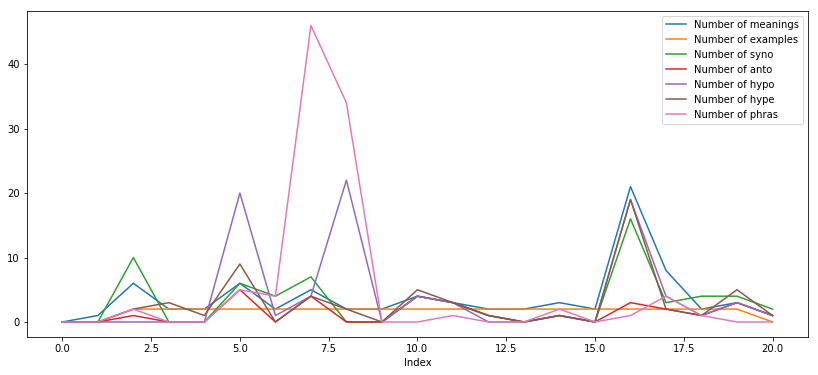

In [390]:
plt.figure(figsize=(14,6))

sns.lineplot(data=num_data, dashes = False)

Text(0, 0.5, 'Number of synonyms')

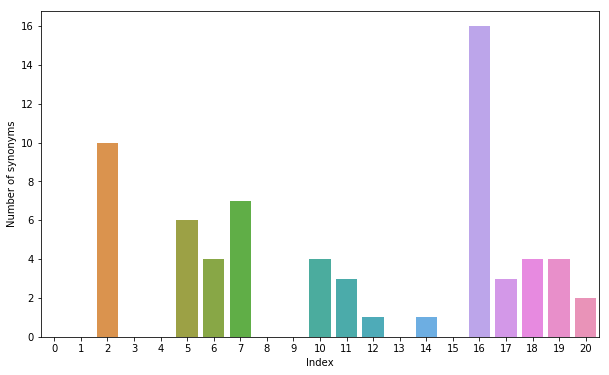

In [391]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Bar chart by index
sns.barplot(x=num_data.index, y=num_data['Number of syno'])

# Add label for vertical axis
plt.ylabel("Number of synonyms")

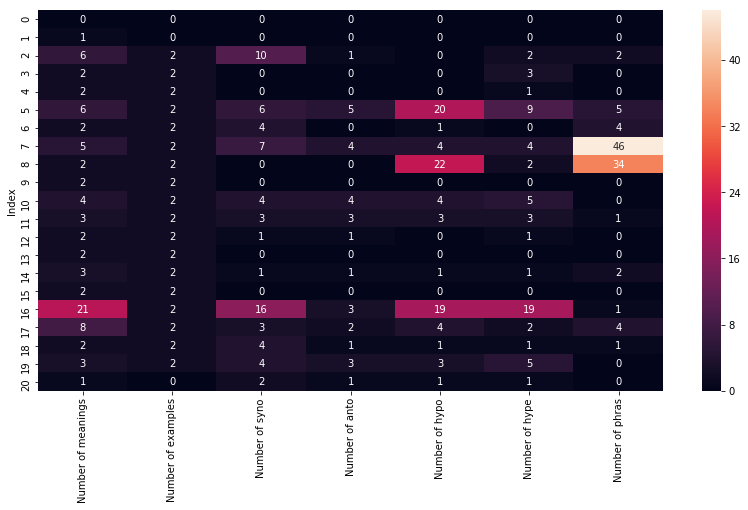

In [392]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

sns.heatmap(data=num_data, annot=True)


In [393]:
num_data.max()

Number of meanings    21
Number of examples     2
Number of syno        16
Number of anto         5
Number of hypo        22
Number of hype        19
Number of phras       46
dtype: int64

In [394]:
argmax = num_data.idxmax()
argmax.map(lambda x: data['title'][x])

Number of meanings          в
Number of examples    мальчик
Number of syno              в
Number of anto          химия
Number of hypo         деньги
Number of hype              в
Number of phras          день
dtype: object

У слова день действительно много фразеологизмов https://ru.wiktionary.org/wiki/%D0%B4%D0%B5%D0%BD%D1%8C